In [8]:
from google.colab import output
output.enable_custom_widget_manager()

In [9]:
# Install LAMMPS from the Ubuntu package repository
!apt-get update
!apt-get install -y lammps


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [10]:
!lmp -h


Large-scale Atomic/Molecular Massively Parallel Simulator - 29 Sep 2021 - Update 2

Usage example: lmp -var t 300 -echo screen -in in.alloy

List of command line options supported by this LAMMPS executable:

-echo none/screen/log/both  : echoing of input script (-e)
-help                       : print this help message (-h)
-in none/filename           : read input from file or stdin (default) (-i)
-kokkos on/off ...          : turn KOKKOS mode on or off (-k)
-log none/filename          : where to send log output (-l)
-mdi '<mdi flags>'          : pass flags to the MolSSI Driver Interface
-mpicolor color             : which exe in a multi-exe mpirun cmd (-m)
-cite                       : select citation reminder style (-c)
-nocite                     : disable citation reminder (-nc)
-package style ...          : invoke package command (-pk)
-partition size1 size2 ...  : assign partition sizes (-p)
-plog basename              : basename for partition logs (-pl)
-pscreen basename       

In [11]:
!lmp -in Vac_PEG_input.lammps

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (-23.316994 -8.7438728 -8.7438728) to (23.316994 8.7438728 8.7438728)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  66 atoms
  reading velocities ...
  66 velocities
  scanning bonds ...
  4 = max bonds/atom
  scanning angles ...
  6 = max angles/atom
  scanning dihedrals ...
  6 = max dihedrals/atom
  reading bonds ...
  65 bonds
  reading angles ...
  118 angles
  reading dihedrals ...
  74 dihedrals
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0.5     
  special bond factors coul:  0        0        0       
     4 = max # of 1-2 neighbors
     6 = max # of 1-3 neighbors
    12 = max # of 1-4 neighbors
    14 = max # of special neighbors
  special bonds CPU = 0.000 seconds
  read_data CPU = 0.008 seconds
66 atoms in group PEG
1 atoms in group oxy

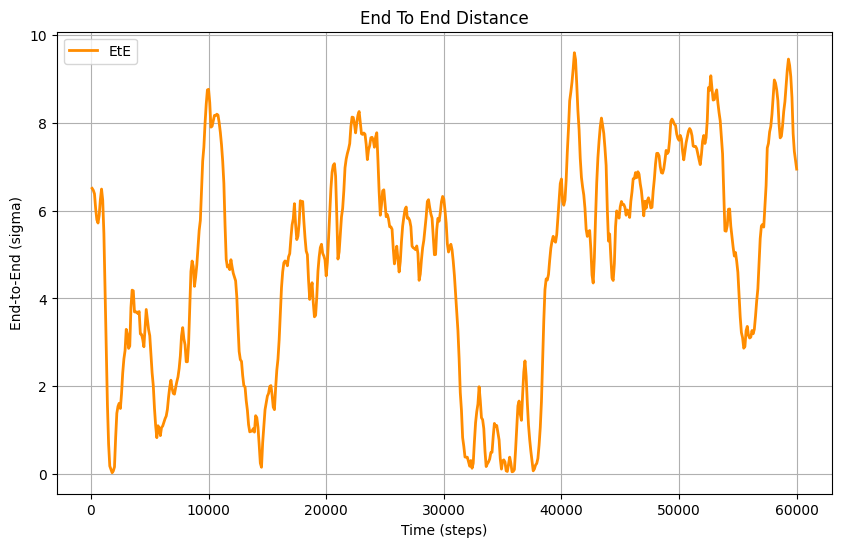

In [12]:
import matplotlib.pyplot as plt

# Load the data
data = []
with open("end-to-end-distance.dat", "r") as f:
    for line in f:
        # Skip empty lines or comments
        if line.strip() and not line.startswith("#"):
            data.append([float(x) for x in line.split()])

# Convert to separate lists
time, temperature = zip(*data)

# Customize the plot
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, color="darkorange", linewidth=2, label="EtE")
plt.xlabel("Time (steps)")
plt.ylabel("End-to-End (sigma)")
plt.title("End To End Distance")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [13]:
!lmp -in Vac_PEG_pull_input.lammps

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (-23.316994 -8.7438728 -8.7438728) to (23.316994 8.7438728 8.7438728)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  66 atoms
  reading velocities ...
  66 velocities
  scanning bonds ...
  4 = max bonds/atom
  scanning angles ...
  6 = max angles/atom
  scanning dihedrals ...
  6 = max dihedrals/atom
  reading bonds ...
  65 bonds
  reading angles ...
  118 angles
  reading dihedrals ...
  74 dihedrals
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0.5     
  special bond factors coul:  0        0        0       
     4 = max # of 1-2 neighbors
     6 = max # of 1-3 neighbors
    12 = max # of 1-4 neighbors
    14 = max # of special neighbors
  special bonds CPU = 0.000 seconds
  read_data CPU = 0.007 seconds
66 atoms in group PEG
1 atoms in group oxy

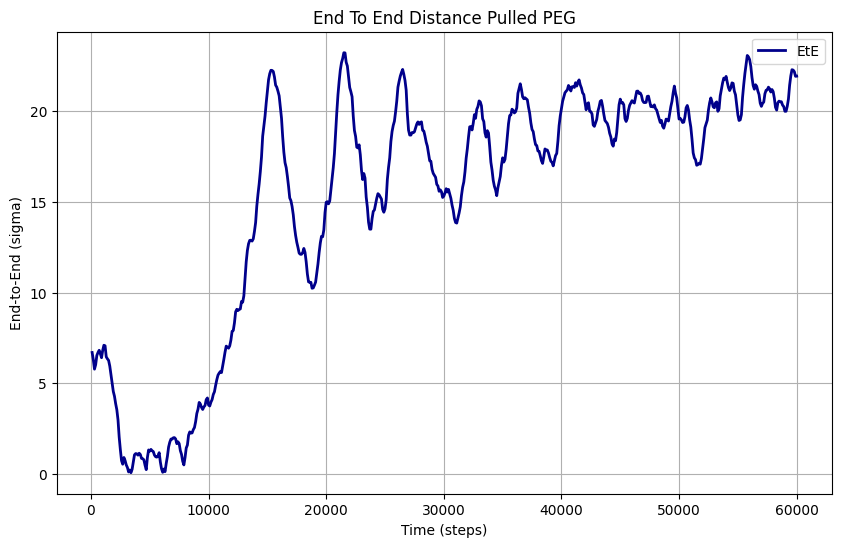

In [14]:
import matplotlib.pyplot as plt

# Load the data
data = []
with open("pull_end-to-end-distance.dat", "r") as f:
    for line in f:
        # Skip empty lines or comments
        if line.strip() and not line.startswith("#"):
            data.append([float(x) for x in line.split()])

# Convert to separate lists
time, temperature = zip(*data)

# Customize the plot
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, color="darkblue", linewidth=2, label="EtE")
plt.xlabel("Time (steps)")
plt.ylabel("End-to-End (sigma)")
plt.title("End To End Distance Pulled PEG")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()